In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Initializing the dataframe
data = pd.DataFrame(boston.data)
data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [4]:
data.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1    

In [5]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s
#Check the shape of dataframe
data.shape

(506, 14)

In [6]:
data.columns ##displaying the columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [7]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [8]:
data.nunique

<bound method DataFrame.nunique of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98

In [9]:
data.isnull().sum() ##observing the number of missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
data.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98 

In [11]:
corr = data.corr() ##checking the correlation of the datasets
corr.shape

(14, 14)

<AxesSubplot:>

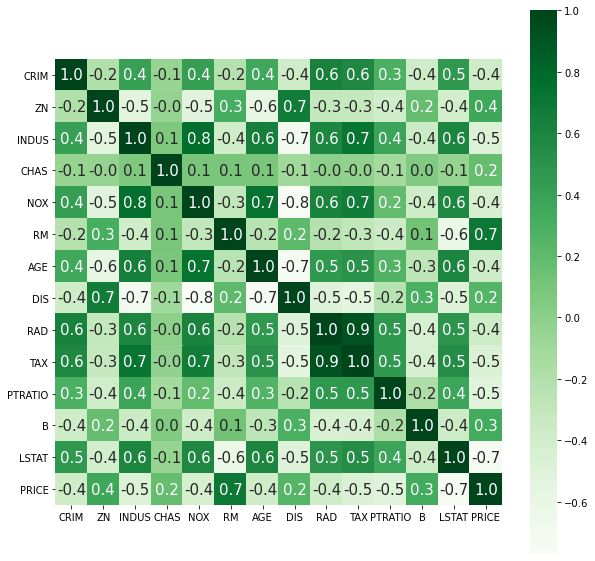

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [13]:
# Spliting target variable(price) and independent variables
X = data.drop(['PRICE'], axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
y = data['PRICE']
y.head()
#y=dependent, x = independent:y=a+bx; a=intercept, b= slope

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [15]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split #import the library for splitting the datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS   RAD    TAX  \
84    0.05059   0.0   4.49   0.0  0.449  6.389  48.0   4.7794   3.0  247.0   
354   0.04301  80.0   1.91   0.0  0.413  5.663  21.9  10.5857   4.0  334.0   
221   0.40771   0.0   6.20   1.0  0.507  6.164  91.3   3.0480   8.0  307.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096  96.9   3.7598   4.0  307.0   
267   0.57834  20.0   3.97   0.0  0.575  8.297  67.0   2.4216   5.0  264.0   
..        ...   ...    ...   ...    ...    ...   ...      ...   ...    ...   
385  16.81180   0.0  18.10   0.0  0.700  5.277  98.1   1.4261  24.0  666.0   
197   0.04666  80.0   1.52   0.0  0.404  7.107  36.6   7.3090   2.0  329.0   
439   9.39063   0.0  18.10   0.0  0.740  5.627  93.9   1.8172  24.0  666.0   
174   0.08447   0.0   4.05   0.0  0.510  5.859  68.7   2.7019   5.0  296.0   
122   0.09299   0.0  25.65   0.0  0.581  5.961  92.9   2.0869   2.0  188.0   

     PTRATIO       B  LSTAT  
84      18.5  396.90   9.62  
354

In [16]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()
lm

LinearRegression()

In [17]:
#modelling the X_train & Y_train
lm.fit(X_train, y_train) #fitting the model into the training datasets

LinearRegression()

In [19]:
# Value of y intercept
lm.intercept_


36.357041376595205

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


In [22]:
# Model prediction on train data
y_pred = lm.predict(X_train)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,24.522480
1,15.197510
2,25.577206
3,13.939400
4,39.466513
...,...
349,8.608369
350,31.511078
351,13.647191
352,26.501062


In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


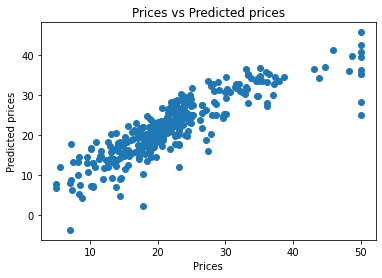

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

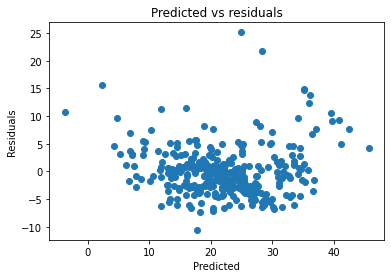

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\Dell-USA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


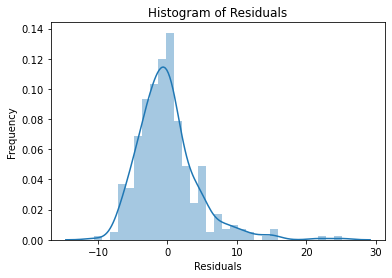

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#testing data

# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
print(y_test_pred)


# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

#Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.


In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)
print(y_pred)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


[23.075 18.865 20.465 13.718 47.43  21.701 47.633 14.521 21.012 49.19
 34.785  9.844 15.283 22.432 24.645 24.95  18.161 46.387 23.149 20.892
 18.482 19.695 18.953 14.679 22.866 15.377 15.594 45.932 21.273 14.061
 16.157 21.818 21.722 21.439 23.562 17.854 16.393  5.801  8.516 25.63
 18.838 21.435 29.169  6.445 11.697  7.975 33.32  15.1   12.814 26.615
 17.509  6.604 23.318 23.837 23.042 18.609 13.652 23.592 24.408 15.157
  9.827 22.573 23.023 27.661 14.634 18.876 20.357 14.929 20.366 17.648
 20.424 42.641 30.726 19.944 17.431 19.524 21.894 33.157 46.672 33.265
 20.343 21.703  8.878 12.066 14.255 22.858 18.82  21.158 21.399 21.297
 17.61  22.486 35.416 29.002 12.032 19.528 22.274  9.231 21.449 19.529
 20.908 23.788 23.837 19.097 25.985 48.992 10.018 18.317 13.955 14.875
 16.447 16.114 20.72  20.903 28.229 21.475 22.206 24.439 25.933 36.631
 18.684 28.812 18.996 22.369 23.424 24.247 27.144 21.06  22.777 19.352
 16.427 23.208 13.777 19.101 20.941 21.726 23.56  22.314 21.055 12.227
 23.299 

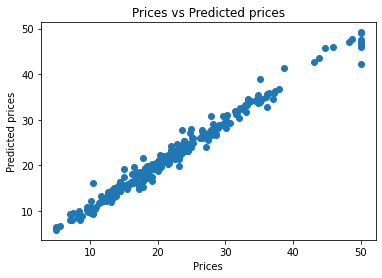

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

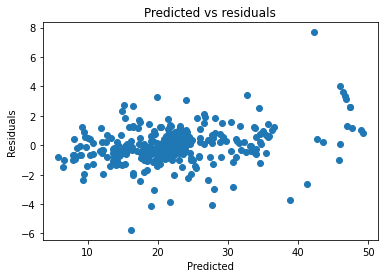

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
print(y_test_pred)


# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


[17.326 23.673 19.027 17.852 46.895 23.873 34.211 18.823 16.049 16.688
 29.669 24.72  20.28  24.501 21.669 13.242 20.052 13.008 12.685 16.327
  7.967 15.892 19.499 19.899 20.213 20.252 17.097 15.922 21.925 18.919
 14.213 23.018 32.79  22.356 14.768 13.804 30.807 44.093 23.83  23.187
 44.959 30.597 13.174 30.011 28.922 20.389 48.308 20.214 21.644 23.255
 30.774 22.717 13.28  27.201 15.478 20.97  25.441 32.284 20.239 29.706
 17.342 21.254 26.852 20.513 43.951 27.297 27.72   8.479 19.59  22.038
 22.328 20.632 25.333 26.64  16.985 33.003 15.588 23.477 15.299 21.7
 19.908 16.25  26.327 20.989 24.693 20.848 33.606 20.181 21.168 47.506
 26.652 47.964 19.546 47.532 21.503 21.032 21.752 27.934 15.452 19.553
  8.939 21.516 35.958 15.107 24.32  20.231 37.912 32.538 44.539 22.835
 22.595 21.659 17.647 28.996 36.096 25.21  48.561 15.4   10.938 18.871
 21.182 13.786 23.758 23.143 19.35  18.706 48.71  13.84  14.865 10.346
 46.372 17.041 47.333 25.68  41.109 19.864 10.931 23.341 20.971 19.709
 15.881 

In [ ]:
#X-GBOOST

# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)
print(y_pred)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

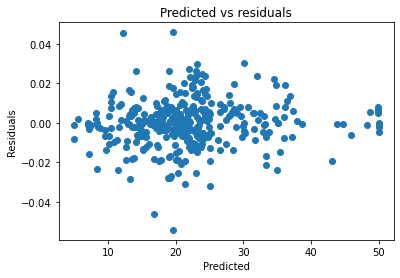

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8579951986672496
Adjusted R^2: 0.8446179347735847
MAE: 2.5309582503218397
MSE: 14.828151619536392
RMSE: 3.850733906612659


In [ ]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Train the model

# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

# Train the model using the training sets 
reg.fit(X_train, y_train)


SVR()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)


# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6419097248941195
Adjusted R^2: 0.628218037904777
MAE: 2.9361501059460284
MSE: 26.953752101332935
RMSE: 5.191700309275655


In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)


# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8579951986672496
Adjusted R^2: 0.8446179347735847
MAE: 2.5309582503218397
MSE: 14.828151619536392
RMSE: 3.850733906612659
